# Creating graphs

From a csv file with at least three columns, two with words and one with a frequency. 

In [1]:
import sqlite3
import pandas as pd
import networkx as nx
import dhlab.graph_networkx_louvain as gnl

# Functions 

In [2]:
def query(db, sql, param=()):
    """ Query a sqlitedatabase with sql and param"""
    with sqlite3.connect(db) as con:
        cur = con.cursor()
        cur.execute(sql, param)
    return cur.fetchall()

In [3]:
def check_graph_first(db, x, top = 20):
    return query(db, "select * from word_graph where first = ? order by pmi desc limit ?", (x, top))
def check_graph_second(db, x, top = 20):
    return query(db, "select * from word_graph where second = ? order by pmi desc limit ?", (x, top))

# Querying word graphs

The table of word pairs is computed using the ngram-table and named word_graph. Indexed and ready to use.

The columns of the word_graph table are first, second, freq, pmi where freq contains the original frequencies, and pmi is the computed association value, using the following formula:

$$\frac{\textrm{freq}(x,y)^2}{\textrm{freq}(x)*\textrm{freq}(y)}$$
 
The frequency is squared to give the cooccurence frequency a higher weight. The marginals freq(x) are aggregated from the word positions. For each word  ùë§  it is associated with two frequencies, one frequency from the occurence in the first column, and one from the second column.



In [4]:
word_graphs = "c://Users/larsj/Documents/word_graphs_databases/book_news_word_pairs.db"

In [5]:
def expand(db, x, top = 30):
    a = check_graph_first(db, x, top)
    b = check_graph_second(db, x, top)
    words = {x[1] for x in a} | {x[0] for x in b} - {x}
    G = a + b
    for word in words:
        G += check_graph_first(db, word, top) + check_graph_second(db, word, top)
    return G

In [6]:
edges = [tuple(x[:3]) for x in expand(word_graphs, "√∏l", top = 20)]
g = nx.DiGraph()
g.add_weighted_edges_from(edges)
g = g.subgraph([n for n,d in g.out_degree() if d > 0])

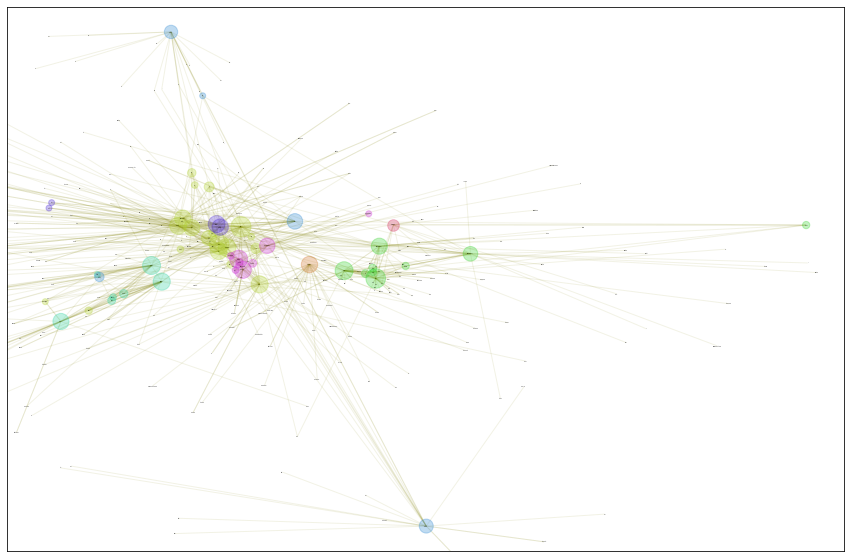

In [7]:
gnl.show_graph(g, spread = .4, fontsize = 1)

In [8]:
gnl.show_communities(g)

√∏l-vin :  √∏l, vin, brennevin, snaps, sprit, rusbrus, br√¶ndevin, Vin, dram, ol, 01, √òl, hetvin, lik√∏r, mat, Ol, sterk√∏l, √∏ll, champagne, ,, spiritus, spirituosa, svakvin, vine, Br√¶ndevin, drikkebrennevin, Sydfrugter, sild, Brennevin, sl, tobak, heitvin, portvin, vin-, source, netvin, hedvin, Br√∏d, pl, sterkvin, lettvin, sm√∏rbr√∏d, el, √∏li, potetmel, saltemakril, potetmj√∏l, Nl, √ò1, Brsd, arak, spekekj√∏tt, benzol, kaffekjele, syltelabbar, Till, bayer, sko, m√∏lje, Dl, vm, br√∏d, BrFd, Brpd, cola, Sprit, II, junk-food, √∏i, Ll, viner, ferdigpoteter, livsfryd, rompunsj, Vl, √∏ller, brask, prosent, piller, vim, told, glykose, O1, erterbr√∏d, dopingpreparater, Bl, spritt, reseptblanketter, ribbestek, glyserin, ¬ª, sex, √∏1, Brod, Sild, bier, skjellakk, smuglerbr√¶ndevin, vln, kvinnfolk, √òf, kamferdrops, √∏ldrykk, Tresprit

brus-p√∏lser :  brus, p√∏lser, mineralvann, mineralvand, kaffe, is, snacks, v√∏rter√∏l, kaker, Kaffe, melk, pizza, kj√∏ttkaker, polser, boller, snop, lett√∏l